In [29]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [30]:
url = "https://raw.githubusercontent.com/doogzultz/time_series_project/main/data.csv"
data = pd.read_csv(url)

In [31]:
data.shape

(32202, 16)

In [32]:
''' checking the features, types, and for nulls '''

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32202 entries, 0 to 32201
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              32202 non-null  object 
 1   identifier        32202 non-null  object 
 2   market_cap        32202 non-null  float64
 3   sector            32202 non-null  int64  
 4   index_membership  32202 non-null  bool   
 5   factor_1          32202 non-null  float64
 6   factor_2          32202 non-null  float64
 7   factor_3          32202 non-null  float64
 8   factor_4          32202 non-null  float64
 9   factor_5          32202 non-null  float64
 10  factor_6          32202 non-null  float64
 11  factor_7          32202 non-null  float64
 12  factor_8          32202 non-null  float64
 13  factor_9          32202 non-null  float64
 14  factor_10         32202 non-null  float64
 15  target            32202 non-null  float64
dtypes: bool(1), float64(12), int64(1), objec

In [33]:
data.head(5)

date    identifier    market_cap  sector  index_membership  factor_1  \
0  2010-01-06  PEOLTD6JT1H8  7.190555e+09      40              True  0.542152   
1  2010-01-06  CU207TQ2XDV5  5.857240e+08      35              True  0.220381   
2  2010-01-06  DKHPXAJKWEJ4  2.233829e+09      40              True  0.213919   
3  2010-01-06  LSJW0IUKSGL4  9.037927e+09      40              True  0.324657   
4  2010-01-06  BL42ED83CIW5  6.268824e+09      50              True  0.751834   

   factor_2  factor_3  factor_4  factor_5  factor_6  factor_7  factor_8  \
0 -0.000300  0.301775  0.393536  0.099153  0.316418  0.897486  0.472729   
1 -0.000084  0.712309  0.398954  0.420881  0.502019  0.017691  0.590987   
2 -0.000055  0.869317  0.928662  0.741415  0.630970  0.397990  0.552974   
3  0.000211  0.492034  0.411192  0.582819  0.028141  0.845029  0.963876   
4 -0.000054  0.448101  0.663682  0.992310  0.805440  0.168199  0.528944   

   factor_9  factor_10    target  
0 -0.000500   0.577285 -0.001568  
1 -0.000160   0.227243 -0.000364  
2 -0.000399   0.187541 -0.000357  
3  0.000154   0.928168  0.000482  
4 -0.000031   0.150358 -0.000030

In [34]:
data.tail(5)

date    identifier    market_cap  sector  index_membership  \
32197  2011-12-28  NAL0VSQAS2E1  2.187961e+09      20              True   
32198  2011-12-28  GTQACAQEX0S7  6.630383e+09      55              True   
32199  2011-12-28  THIOIJGJYVY6  6.236588e+09      10              True   
32200  2011-12-28  RSWIUCJ9P7E9  1.129460e+10      30              True   
32201  2011-12-28  LI0DOWMAPJI3  5.186957e+09      50              True   

       factor_1  factor_2  factor_3  factor_4  factor_5  factor_6  factor_7  \
32197  0.059488 -0.000665  0.443405  0.057153  0.669305  0.917963  0.593669   
32198  0.546955 -0.005255  0.860117  0.096773  0.882369  0.745993  0.261197   
32199  0.796562  0.000176  0.637660  0.093420  0.901992  0.623066  0.404097   
32200  0.952059  0.000002  0.916464  0.496177  0.473402  0.273621  0.153440   
32201  0.176597 -0.000149  0.123162  0.705973  0.579434  0.433761  0.378818   

       factor_8  factor_9  factor_10    target  
32197  0.501561 -0.000669   0.366823 -0.000425  
32198  0.592820 -0.008829   0.240491 -0.012405  
32199  0.947511  0.002690   0.904231  0.001832  
32200  0.576355  0.000002   0.739407  0.000010  
32201  0.547389 -0.000188   0.126069 -0.000030

In [35]:
''' checking the eindentifier counts: Hypothesis at this point is that each identifier is a firm with time series and there are only unique dates for each identifier '''

ident_counts = data.value_counts('identifier')
ident_counts

identifier
AD41WBQFVG43    104
UZ4DWDZ8ALZ4    104
KR47536Y10D4    104
KPJ8FTV9ESJ3    104
KMHQ727PU8E2    104
               ... 
PNUM57CYEB27      5
KHKNKSMXBWP3      5
LYCPQJ19AOY0      5
RENR64FT3I74      5
LALJLSN9UMP2      2
Length: 356, dtype: int64

In [36]:
''' sector distribution with respect to time step'''

sector_counts = data.value_counts('sector')
sector_counts

sector
40    7497
20    6715
25    4278
15    3000
30    2343
55    2307
45    1664
10    1585
35    1578
50    1235
dtype: int64

In [37]:
''' Inquiring about firms which could be listed with two different sectors '''

ident_sector_counts = data.value_counts(['identifier', 'sector'])
ident_sector_counts

identifier    sector
AD41WBQFVG43  35        104
KWUU4KMGHFF6  50        104
JE9Q5KTKVBD1  30        104
JET8FIR8YI57  15        104
JETLKG7YIWY1  40        104
                       ... 
PNUM57CYEB27  35          5
KHKNKSMXBWP3  25          5
LYCPQJ19AOY0  40          5
RENR64FT3I74  20          5
LALJLSN9UMP2  10          2
Length: 357, dtype: int64

In [38]:
''' there is one firm with two sectors '''

for i in range(len(ident_counts.index)):
  if len(ident_sector_counts[ident_counts.index[i]]) >1:
    print(ident_counts.index[i], ident_sector_counts[ident_counts.index[i]])

UZ4DWDZ8ALZ4 sector
25    86
50    18
dtype: int64


In [39]:
''' checking distribution of dates '''

date_counts = data.value_counts('date', sort = False).sort_index()
date_counts, date_counts.values

(date
 2010-01-06    318
 2010-01-13    318
 2010-01-20    318
 2010-01-27    318
 2010-02-03    318
              ... 
 2011-11-30    301
 2011-12-07    301
 2011-12-14    301
 2011-12-21    302
 2011-12-28    302
 Length: 104, dtype: int64,
 array([318, 318, 318, 318, 318, 315, 315, 315, 315, 315, 315, 315, 315,
        315, 314, 314, 314, 314, 313, 313, 313, 313, 313, 314, 314, 314,
        315, 315, 315, 315, 315, 310, 310, 310, 310, 310, 310, 310, 310,
        310, 310, 310, 311, 311, 312, 312, 312, 312, 312, 312, 312, 312,
        312, 311, 311, 312, 313, 308, 308, 308, 308, 307, 307, 306, 306,
        306, 306, 306, 306, 306, 306, 306, 306, 307, 307, 307, 306, 306,
        307, 307, 307, 307, 307, 306, 306, 306, 305, 305, 305, 305, 305,
        305, 305, 305, 305, 305, 301, 301, 301, 301, 301, 301, 302, 302]))

In [40]:
'''
    Example time series, change identifier to test others
    Note: We check the date distribution for each time series in the preprocessing and model testing step'''

data[data['identifier']=='UZ4DWDZ8ALZ4'].sort_values('date')

date    identifier    market_cap  sector  index_membership  \
198    2010-01-06  UZ4DWDZ8ALZ4  1.670343e+10      25              True   
516    2010-01-13  UZ4DWDZ8ALZ4  2.136117e+10      25              True   
834    2010-01-20  UZ4DWDZ8ALZ4  2.490027e+10      25              True   
1152   2010-01-27  UZ4DWDZ8ALZ4  2.688954e+10      25              True   
1470   2010-02-03  UZ4DWDZ8ALZ4  2.049724e+10      25              True   
...           ...           ...           ...     ...               ...   
30889  2011-11-30  UZ4DWDZ8ALZ4  1.835756e+10      50              True   
31190  2011-12-07  UZ4DWDZ8ALZ4  1.932175e+10      50              True   
31491  2011-12-14  UZ4DWDZ8ALZ4  1.656810e+10      50              True   
31792  2011-12-21  UZ4DWDZ8ALZ4  1.841629e+10      50              True   
32094  2011-12-28  UZ4DWDZ8ALZ4  1.310341e+10      50              True   

       factor_1  factor_2  factor_3  factor_4  factor_5  factor_6  factor_7  \
198    0.483567 -0.001105  0.634317  0.978968  0.507467  0.748222  0.190475   
516    0.150871 -0.002224  0.877048  0.279193  0.164441  0.586184  0.793980   
834    0.933392 -0.006709  0.194842  0.070366  0.919291  0.828097  0.514988   
1152   0.439097 -0.000002  0.039981  0.071454  0.081716  0.414427  0.271938   
1470   0.490129  0.000267  0.411052  0.953405  0.503651  0.839212  0.088133   
...         ...       ...       ...       ...       ...       ...       ...   
30889  0.239458 -0.000029  0.840417  0.926790  0.720229  0.039178  0.180185   
31190  0.654320  0.000036  0.216851  0.290772  0.304616  0.881084  0.299440   
31491  0.243379 -0.000085  0.466305  0.175576  0.295439  0.461745  0.293227   
31792  0.651499 -0.000322  0.508019  0.229245  0.149276  0.876511  0.493672   
32094  0.191776 -0.002638  0.952018  0.751888  0.316218  0.024669  0.235010   

       factor_8      factor_9  factor_10        target  
198    0.395995 -6.036674e-03   0.369833 -5.660904e-03  
516    0.244184 -6.264045e-04   0.099372 -9.442701e-04  
834    0.685251 -7.367703e-03   0.426766 -2.464927e-03  
1152   0.801520 -9.479391e-07   0.858705 -1.453744e-07  
1470   0.714198  3.461643e-04   0.065476  1.096343e-04  
...         ...           ...        ...           ...  
30889  0.835596 -1.336336e-04   0.764821 -6.642306e-05  
31190  0.414954  1.683174e-05   0.514097  2.661698e-05  
31491  0.741432 -1.397610e-04   0.448979 -3.184349e-06  
31792  0.440844 -4.865059e-04   0.113589 -3.082903e-04  
32094  0.443530 -4.653327e-03   0.572939 -4.806629e-03  

[104 rows x 16 columns]

In [41]:
''' checking the single firm with two sectors. Hypothesis is that it switched after a given date '''

data[(data['identifier']=='UZ4DWDZ8ALZ4') & (data['sector'].astype(int)== 25)].sort_values('date')

date    identifier    market_cap  sector  index_membership  \
198    2010-01-06  UZ4DWDZ8ALZ4  1.670343e+10      25              True   
516    2010-01-13  UZ4DWDZ8ALZ4  2.136117e+10      25              True   
834    2010-01-20  UZ4DWDZ8ALZ4  2.490027e+10      25              True   
1152   2010-01-27  UZ4DWDZ8ALZ4  2.688954e+10      25              True   
1470   2010-02-03  UZ4DWDZ8ALZ4  2.049724e+10      25              True   
...           ...           ...           ...     ...               ...   
25405  2011-07-27  UZ4DWDZ8ALZ4  1.703122e+10      25              True   
25712  2011-08-03  UZ4DWDZ8ALZ4  1.795915e+10      25              True   
26018  2011-08-10  UZ4DWDZ8ALZ4  1.290370e+10      25              True   
26324  2011-08-17  UZ4DWDZ8ALZ4  1.373345e+10      25              True   
26630  2011-08-24  UZ4DWDZ8ALZ4  1.870683e+10      25              True   

       factor_1  factor_2  factor_3  factor_4  factor_5  factor_6  factor_7  \
198    0.483567 -0.001105  0.634317  0.978968  0.507467  0.748222  0.190475   
516    0.150871 -0.002224  0.877048  0.279193  0.164441  0.586184  0.793980   
834    0.933392 -0.006709  0.194842  0.070366  0.919291  0.828097  0.514988   
1152   0.439097 -0.000002  0.039981  0.071454  0.081716  0.414427  0.271938   
1470   0.490129  0.000267  0.411052  0.953405  0.503651  0.839212  0.088133   
...         ...       ...       ...       ...       ...       ...       ...   
25405  0.273015 -0.000463  0.730525  0.033269  0.020641  0.912161  0.592734   
25712  0.763585  0.000563  0.302255  0.754219  0.203438  0.096565  0.818042   
26018  0.441451  0.000022  0.831936  0.378776  0.408412  0.539122  0.228603   
26324  0.525604 -0.000037  0.074395  0.783448  0.655682  0.818998  0.698146   
26630  0.064601 -0.000327  0.931584  0.019512  0.013690  0.861926  0.382889   

       factor_8      factor_9  factor_10        target  
198    0.395995 -6.036674e-03   0.369833 -5.660904e-03  
516    0.244184 -6.264045e-04   0.099372 -9.442701e-04  
834    0.685251 -7.367703e-03   0.426766 -2.464927e-03  
1152   0.801520 -9.479391e-07   0.858705 -1.453744e-07  
1470   0.714198  3.461643e-04   0.065476  1.096343e-04  
...         ...           ...        ...           ...  
25405  0.227475 -1.727935e-03   0.344151 -1.090926e-03  
25712  0.579486  3.082428e-03   0.450898  1.432373e-03  
26018  0.910260  1.885027e-05   0.593101  6.048605e-05  
26324  0.560780 -3.918198e-06   0.544310 -3.539774e-05  
26630  0.788429 -3.825564e-04   0.436246 -1.449683e-03  

[86 rows x 16 columns]

In [42]:
data[(data['identifier']=='UZ4DWDZ8ALZ4') & (data['sector'].astype(int)== 50)].sort_values('date')

date    identifier    market_cap  sector  index_membership  \
26936  2011-08-31  UZ4DWDZ8ALZ4  1.579843e+10      50              True   
27241  2011-09-07  UZ4DWDZ8ALZ4  2.484527e+10      50              True   
27546  2011-09-14  UZ4DWDZ8ALZ4  2.195417e+10      50              True   
27851  2011-09-21  UZ4DWDZ8ALZ4  2.142499e+10      50              True   
28156  2011-09-28  UZ4DWDZ8ALZ4  2.220969e+10      50              True   
28461  2011-10-05  UZ4DWDZ8ALZ4  1.430971e+10      50              True   
28766  2011-10-12  UZ4DWDZ8ALZ4  1.103164e+10      50              True   
29071  2011-10-19  UZ4DWDZ8ALZ4  2.163046e+10      50              True   
29376  2011-10-26  UZ4DWDZ8ALZ4  1.593502e+10      50              True   
29681  2011-11-02  UZ4DWDZ8ALZ4  2.649654e+10      50              True   
29986  2011-11-09  UZ4DWDZ8ALZ4  1.802693e+10      50              True   
30287  2011-11-16  UZ4DWDZ8ALZ4  2.049345e+10      50              True   
30588  2011-11-23  UZ4DWDZ8ALZ4  2.295019e+10      50              True   
30889  2011-11-30  UZ4DWDZ8ALZ4  1.835756e+10      50              True   
31190  2011-12-07  UZ4DWDZ8ALZ4  1.932175e+10      50              True   
31491  2011-12-14  UZ4DWDZ8ALZ4  1.656810e+10      50              True   
31792  2011-12-21  UZ4DWDZ8ALZ4  1.841629e+10      50              True   
32094  2011-12-28  UZ4DWDZ8ALZ4  1.310341e+10      50              True   

       factor_1  factor_2  factor_3  factor_4  factor_5  factor_6  factor_7  \
26936  0.201528 -0.000779  0.592416  0.637781  0.565351  0.880911  0.529161   
27241  0.582965 -0.000077  0.690240  0.523921  0.367893  0.450287  0.063433   
27546  0.577094  0.000073  0.115217  0.431123  0.143000  0.862495  0.937893   
27851  0.631985  0.000684  0.816101  0.433132  0.861955  0.379952  0.911740   
28156  0.350123  0.000011  0.584237  0.111317  0.438826  0.778722  0.108398   
28461  0.151283  0.000074  0.196967  0.549370  0.032299  0.370380  0.544485   
28766  0.672454 -0.000134  0.206987  0.974509  0.356018  0.303257  0.618470   
29071  0.117528  0.001829  0.214123  0.764621  0.285185  0.756342  0.881030   
29376  0.285692 -0.000605  0.211293  0.028039  0.381659  0.427206  0.047037   
29681  0.965637  0.000014  0.342696  0.864763  0.096936  0.822560  0.674169   
29986  0.444650  0.015165  0.566446  0.429492  0.712955  0.910427  0.607777   
30287  0.688772 -0.000090  0.168435  0.606083  0.061875  0.048079  0.085458   
30588  0.049565  0.000459  0.170536  0.455571  0.853103  0.059689  0.019741   
30889  0.239458 -0.000029  0.840417  0.926790  0.720229  0.039178  0.180185   
31190  0.654320  0.000036  0.216851  0.290772  0.304616  0.881084  0.299440   
31491  0.243379 -0.000085  0.466305  0.175576  0.295439  0.461745  0.293227   
31792  0.651499 -0.000322  0.508019  0.229245  0.149276  0.876511  0.493672   
32094  0.191776 -0.002638  0.952018  0.751888  0.316218  0.024669  0.235010   

       factor_8  factor_9  factor_10    target  
26936  0.642464 -0.000322   0.683959 -0.000374  
27241  0.034084 -0.000064   0.428324 -0.000086  
27546  0.787638  0.000064   0.124814  0.000049  
27851  0.250192  0.000225   0.564427  0.000500  
28156  0.488349  0.000021   0.656388  0.000009  
28461  0.371196  0.000186   0.399404  0.000203  
28766  0.294314 -0.000374   0.636278 -0.000276  
29071  0.764443  0.001916   0.045059  0.003146  
29376  0.134938 -0.000395   0.007287 -0.000604  
29681  0.338581  0.000004   0.647562  0.000003  
29986  0.147707  0.009623   0.557149  0.007837  
30287  0.112290 -0.000220   0.578837 -0.000015  
30588  0.927036  0.004487   0.165689  0.003604  
30889  0.835596 -0.000134   0.764821 -0.000066  
31190  0.414954  0.000017   0.514097  0.000027  
31491  0.741432 -0.000140   0.448979 -0.000003  
31792  0.440844 -0.000487   0.113589 -0.000308  
32094  0.443530 -0.004653   0.572939 -0.004807

In [43]:
''' index_membership is useless since it is always True, so we drop the column'''

data.value_counts('index_membership')

index_membership
True    32202
dtype: int64

In [44]:
data = data.drop(columns = 'index_membership')

In [45]:
''' basic statistics of the columns '''

data.describe()

market_cap        sector      factor_1      factor_2      factor_3  \
count  3.220200e+04  32202.000000  32202.000000  3.220200e+04  32202.000000   
mean   1.095296e+10     30.774952      0.498756 -1.462113e-04      0.500189   
std    1.572001e+10     12.667972      0.288787  5.759326e-03      0.289240   
min   -4.825453e+08     10.000000      0.000066 -1.545644e-01      0.000063   
25%    2.505520e+09     20.000000      0.249074 -3.602127e-04      0.246556   
50%    4.884047e+09     30.000000      0.496954  8.698222e-07      0.502099   
75%    1.151506e+10     40.000000      0.748845  3.912393e-04      0.752583   
max    1.534334e+11     55.000000      0.999972  8.053847e-02      0.999993   

           factor_4      factor_5      factor_6      factor_7      factor_8  \
count  32202.000000  32202.000000  32202.000000  3.220200e+04  32202.000000   
mean       0.498953      0.500697      0.499683  4.981013e-01      0.498162   
std        0.288920      0.288964      0.288080  2.875331e-01      0.289374   
min        0.000076      0.000056      0.000050  3.547287e-07      0.000034   
25%        0.251858      0.250038      0.251288  2.507394e-01      0.248211   
50%        0.496547      0.501924      0.496901  4.953077e-01      0.495810   
75%        0.749778      0.750799      0.748982  7.454329e-01      0.748112   
max        0.999992      0.999937      0.999943  9.999425e-01      0.999990   

           factor_9     factor_10        target  
count  3.220200e+04  32202.000000  3.220200e+04  
mean  -1.756859e-04      0.498593 -1.844661e-04  
std    6.064242e-03      0.287299  5.914170e-03  
min   -1.945520e-01      0.000023 -1.669913e-01  
25%   -3.680745e-04      0.251549 -3.533136e-04  
50%    9.016693e-07      0.495600  8.821662e-07  
75%    3.857279e-04      0.748538  3.900145e-04  
max    1.045811e-01      0.999971  8.577309e-02

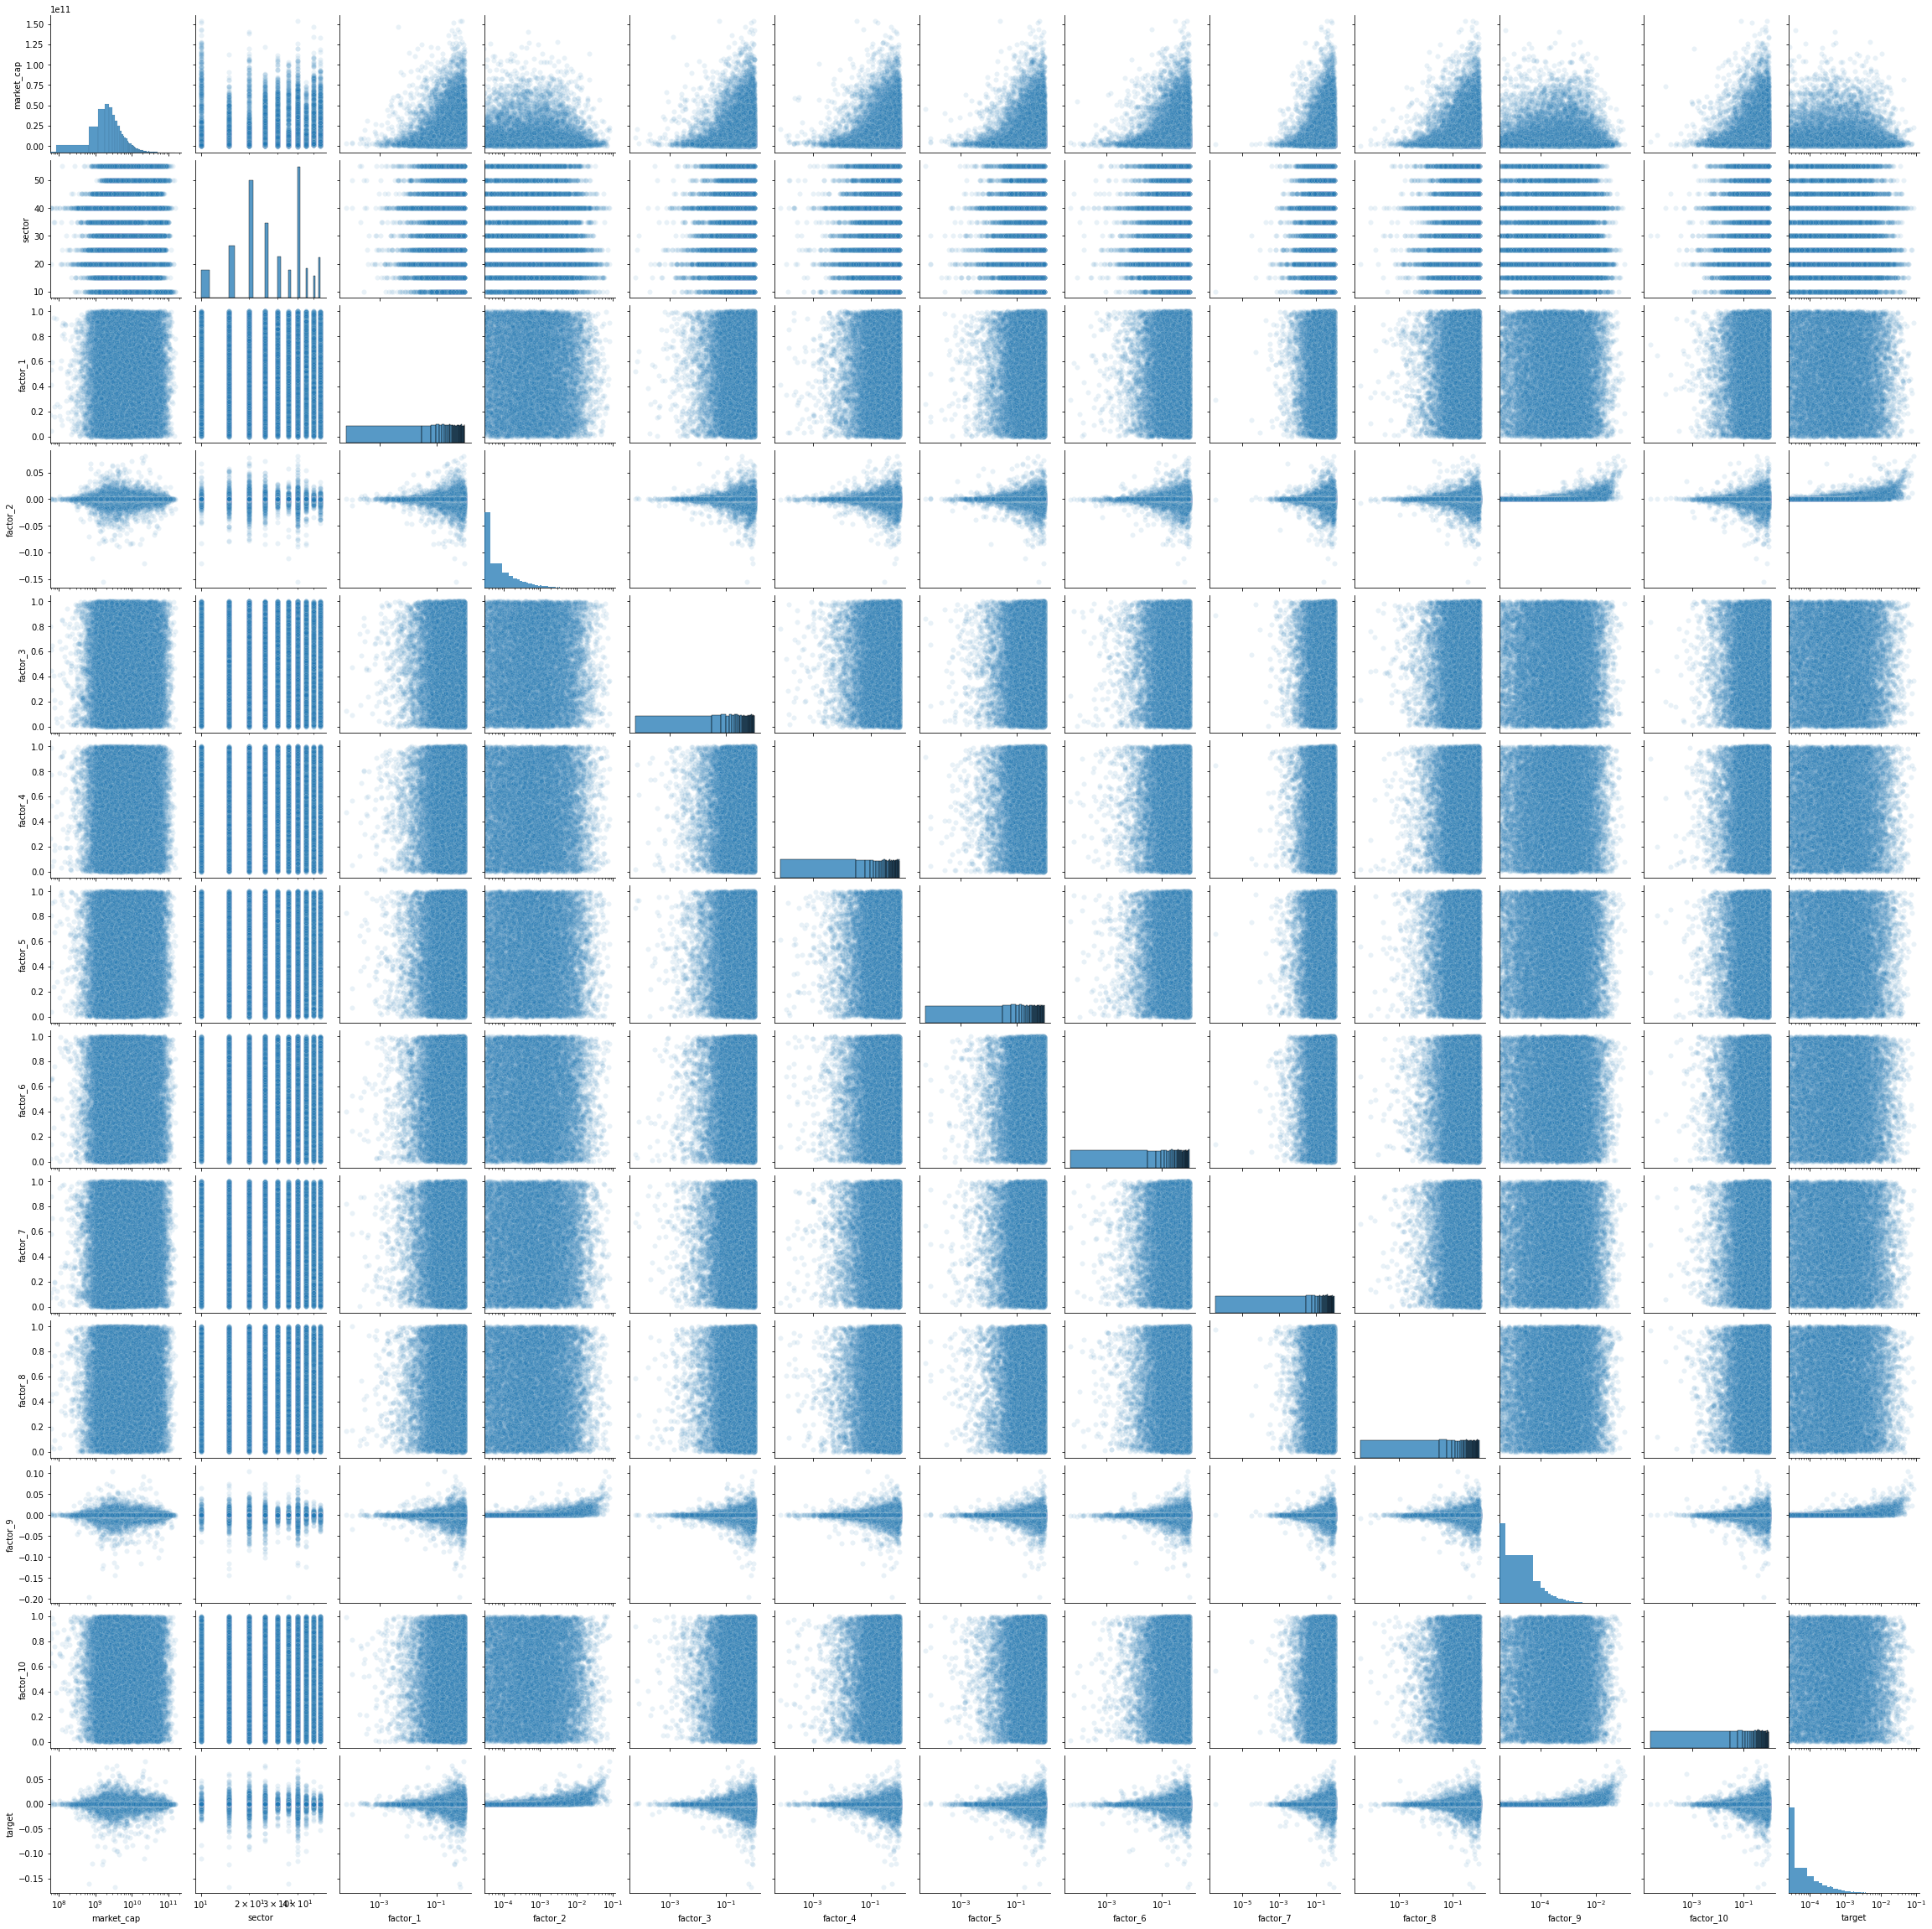

In [46]:
''' 
    Note: may take a few minutes to run 
    Here, we want to understand the distribution of the variables with respect to one another. 
    After experimenting, we see that putting a log scale on one axis gives interesting results in regards to target/factors: Some factors could indicate volitity'''


pairplot = sns.pairplot(data.iloc[:,2:],plot_kws={'alpha': 0.1})
pairplot.set(xscale = 'log')
plt.show()
#scatter_matrix(data.iloc[:,0:15], cmap = 'plasma', c = data['target'],alpha = .01, figsize=(25, 16))

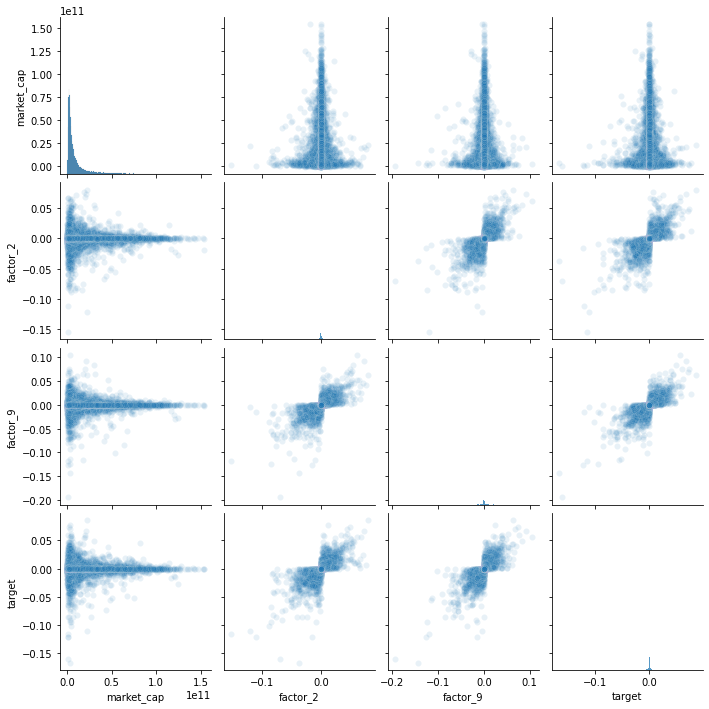

In [47]:
''' 
    Using linear axises worked best for understand the relationship between some variables
    target is strongly linearly correlated with factors 2 and 9, and they are correlated with each other 
    short-term volitity could be correlated with market_cap, which we expect'''

pairplot = sns.pairplot(data.iloc[:,2:], vars = ['market_cap', 'factor_2', 'factor_9', 'target' ],plot_kws={'alpha':0.1})
pairplot.set(xscale = 'linear')
plt.show()
#scatter_matrix(data[['market_cap', 'factor_2', 'factor_9', 'target' ]], cmap = 'plasma', c = data['target'],alpha = .01, figsize=(25, 16))

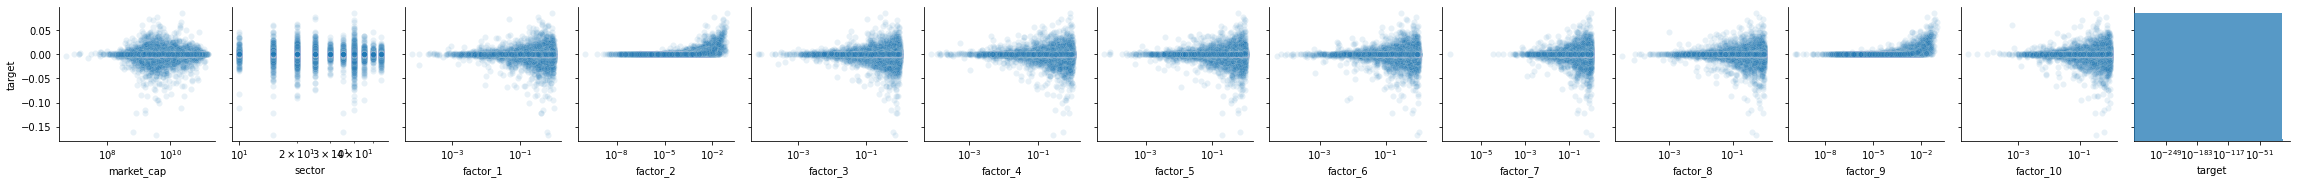

In [184]:
'''
    This is the bottom row of the total pairplot
    The factors could also indicate one month volitity of the target '''
pairplot = sns.pairplot(data.iloc[:,2:], y_vars = 'target', plot_kws={'alpha': 0.1})
pairplot.set(xscale = 'log')
plt.show()

<AxesSubplot:>

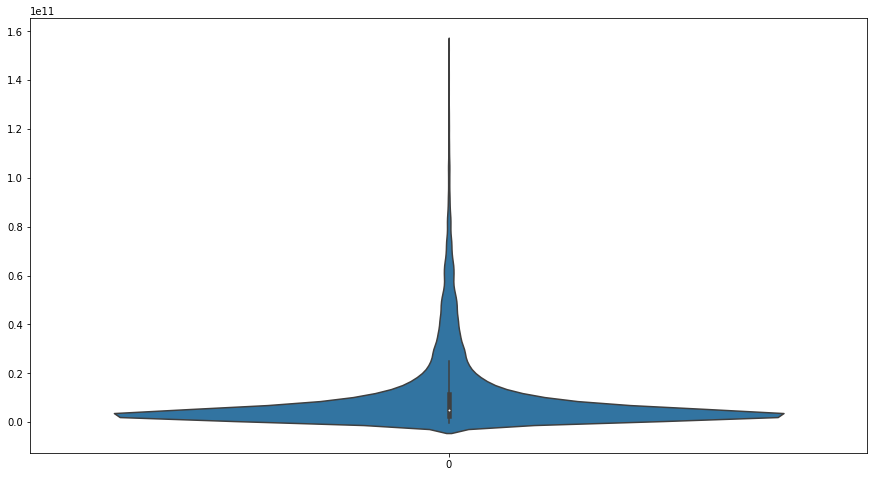

In [49]:
''' Violin plot of market_cap '''
plt.figure(figsize = (15,8))
sns.violinplot(data = data['market_cap'])

<AxesSubplot:>

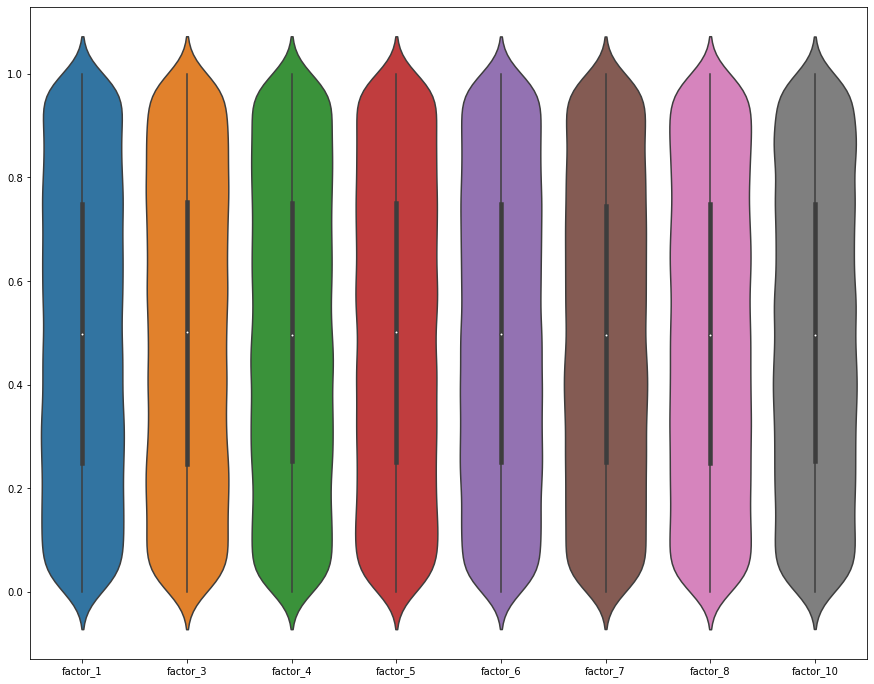

In [50]:
''' Violin plot of all the factors except 2 and 9. Almost uniformly distributed '''
plt.figure(figsize = (15,12))
sns.violinplot(data = data.iloc[:, [4,6,7,8,9,10,11,13]])

<AxesSubplot:>

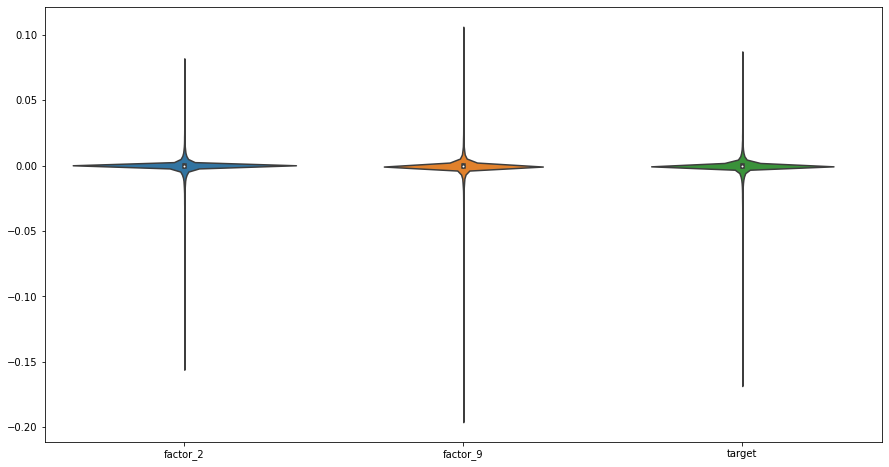

In [53]:
''' Violin plot of factors 2, 9, and target'''
plt.figure(figsize = (15,8))
sns.violinplot(data = data[['factor_2', 'factor_9', 'target']])

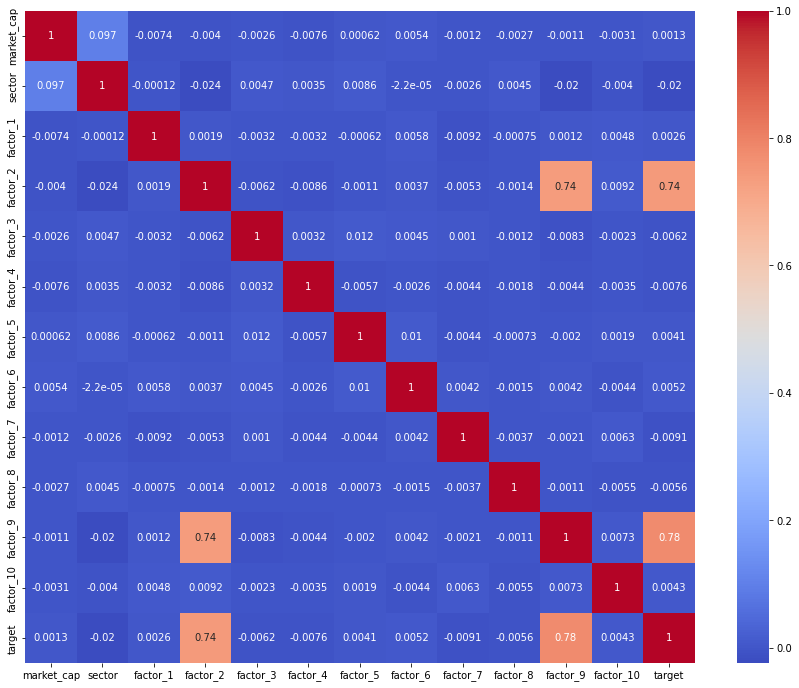

In [54]:
''' 
    we see very strong coorelation of factors 2 and 9 with target, as well as with each other 
    a simple model that disregards previous time steps could be a good starting point in predicting the target
    nothing else is statistically significant with regard to target. Sector and market cap weakly correlated
 '''
plt.figure(figsize = (15,12))
heatmap = sns.heatmap(data.corr(), cmap="coolwarm", annot=True)

In [94]:
data['date'] = data['date'].astype(np.datetime64)

In [187]:
''' Function performs the above visual analysis for single identifiers. '''
def firm_analysis(n, t_ahead):
    '''
    Does visual data analysis for a single idenifier for a specified number of time_steps ahead of current

    Args:
        n -- identifer number 0<= n <= 356, where n is the order value_counts('identifier).index
        t_ahead -- adds additional targets that are t_head of the target of a given data entry.
        These are analysis along with rest of data. Best between 0 and 8.
    '''
    
    #pulling out data for given identifier and sorting by date
    firm = ident_counts.index[n]
    d_firm = data[(data['identifier'] == firm)].sort_values('date', ascending = True).copy().reset_index(drop = True)
    print(f"Sector: {d_firm['sector'].iloc[1]}")
    print(f'Number of entries: {d_firm.shape[0]}')
    
    #plotting the same as above for the specific firm
    weeks = [value for value, date in enumerate(d_firm['date'])]
    plt.figure(figsize = (15,12))
    sns.lineplot(x = weeks, y = 'target', data = d_firm)
    plt.figure(figsize = (15,8))
    sns.violinplot(data = d_firm[['market_cap']])
    plt.figure(figsize = (15,12))
    sns.violinplot(data = d_firm.iloc[:, [4,6,7,8,9,10,11,13]])
    plt.figure(figsize = (15,8))
    sns.violinplot(data = d_firm[['factor_2', 'factor_9', 'target']])
    plt.figure(figsize = (15,12))
    sns.heatmap(d_firm.corr(), cmap="coolwarm", annot=True)

    
    #adding columns to d_firm as target + t time steps

    if t_ahead > 0:
        d_firm_shifted = d_firm.iloc[:-t_ahead].copy()
        s = len(d_firm_shifted.index)
        for t in range(t_ahead):
            d_firm_shifted['{:2d}_ahead'.format(t+1)] = d_firm.iloc[t+1:s+t+1, -1].copy().reset_index(drop = True)
    else:
        firm_shifted = d_firm
    pairplot_1 = sns.pairplot(d_firm_shifted, x_vars = d_firm_shifted.iloc[:,14:].columns, y_vars = ['factor_2', 'factor_9', 'target' ], plot_kws={'alpha': 0.5})
    pairplot_1.set(yscale = 'linear')
    plt.figure(figsize = (15,12))
    shift_corr = d_firm_shifted.corr()
    sns.heatmap(shift_corr.iloc[:,12:], cmap="coolwarm", annot=True)
    pairplot_2 = sns.pairplot(d_firm_shifted, x_vars = d_firm_shifted.iloc[:,14:].columns, plot_kws={'alpha': 0.5})
    pairplot_2.set(yscale = 'log')

    return d_firm_shifted


 

Sector: 50
Number of entries: 104


date    identifier    market_cap  sector  factor_1  factor_2  \
0 2010-01-06  KWUU4KMGHFF6  7.627557e+09      50  0.275393 -0.003182   
1 2010-01-13  KWUU4KMGHFF6  7.049432e+09      50  0.335345 -0.000630   
2 2010-01-20  KWUU4KMGHFF6  6.734286e+09      50  0.937178  0.000018   
3 2010-01-27  KWUU4KMGHFF6  1.018184e+10      50  0.277062  0.000585   
4 2010-02-03  KWUU4KMGHFF6  7.968626e+09      50  0.302930  0.000092   

   factor_3  factor_4  factor_5  factor_6  factor_7  factor_8  factor_9  \
0  0.336466  0.140009  0.235677  0.750440  0.540441  0.845099 -0.000476   
1  0.183171  0.065396  0.060578  0.991311  0.264390  0.156457 -0.000694   
2  0.493891  0.430098  0.355621  0.218163  0.916721  0.854073  0.000009   
3  0.147079  0.458233  0.834169  0.906917  0.540188  0.340281  0.000314   
4  0.099600  0.906627  0.817025  0.132059  0.420203  0.137829  0.000108   

   factor_10        target       1_ahead       2_ahead   3_ahead   4_ahead  \
0   0.927402 -2.686488e-04 -7.325315e-04  9.897356e-07  0.000773  0.000055   
1   0.082447 -7.325315e-04  9.897356e-07  7.725639e-04  0.000055  0.002285   
2   0.071154  9.897356e-07  7.725639e-04  5.469025e-05  0.002285  0.000841   
3   0.491834  7.725639e-04  5.469025e-05  2.285296e-03  0.000841  0.000910   
4   0.848117  5.469025e-05  2.285296e-03  8.413831e-04  0.000910  0.000177   

    5_ahead  
0  0.002285  
1  0.000841  
2  0.000910  
3  0.000177  
4  0.000006

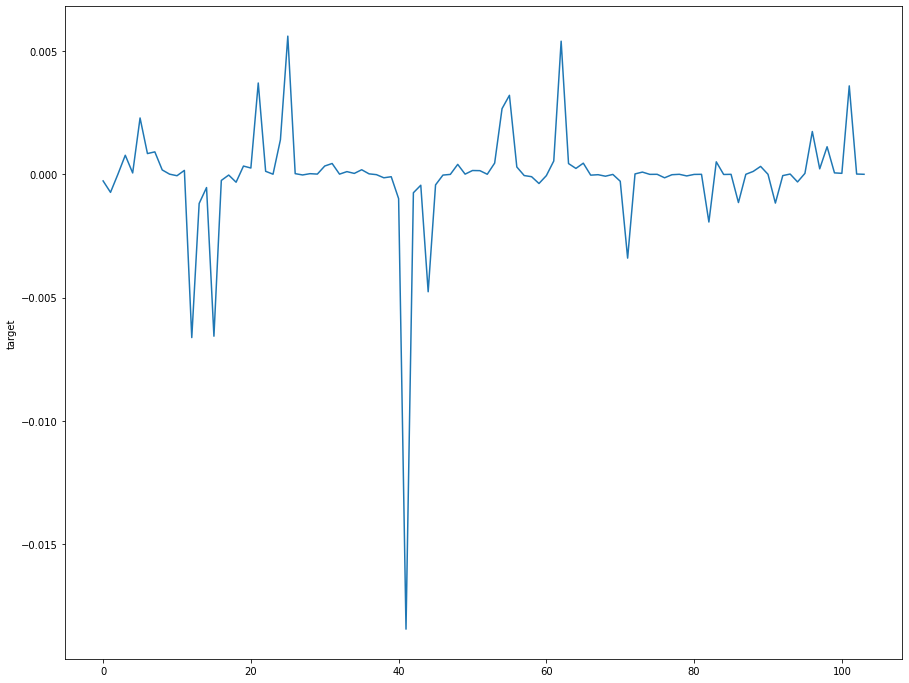

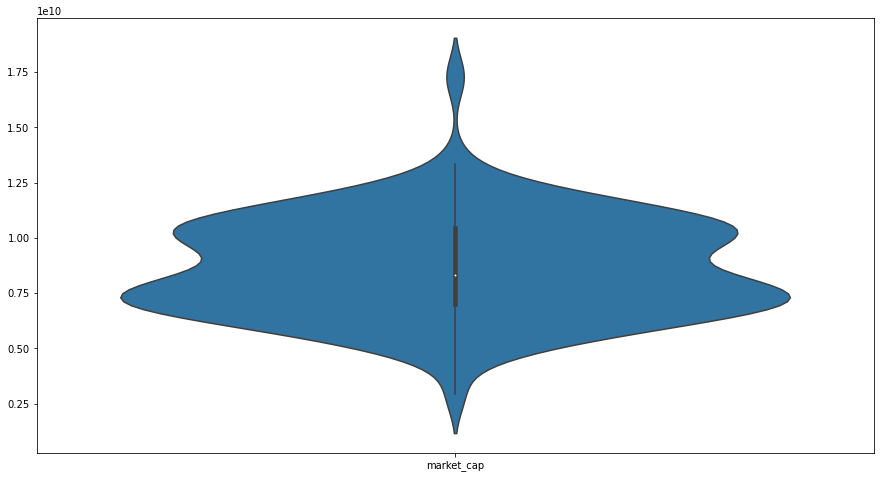

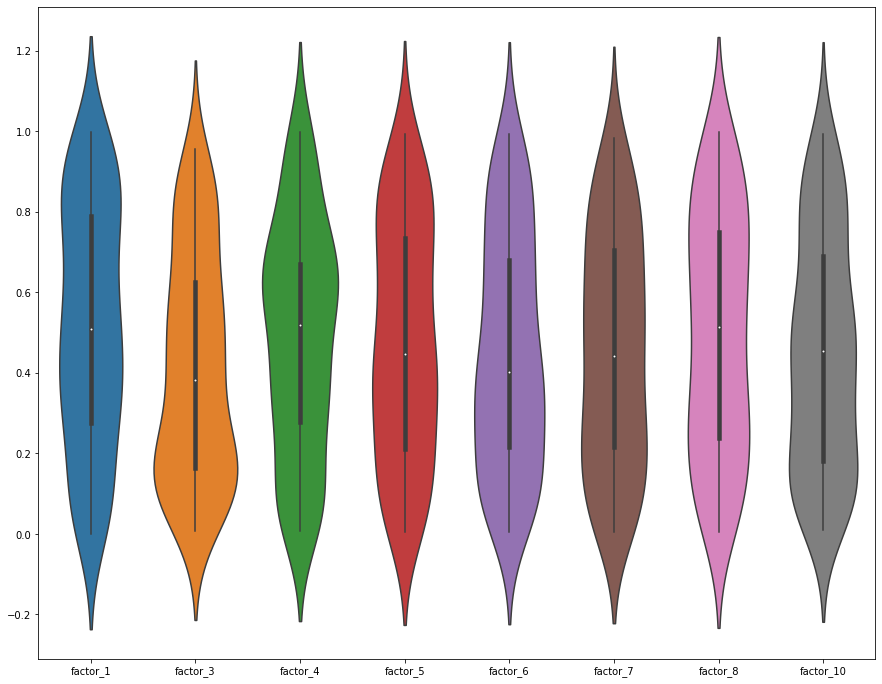

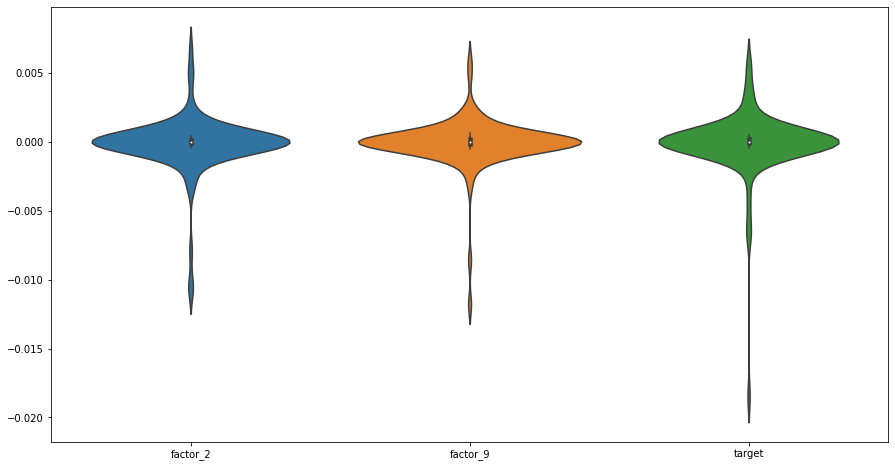

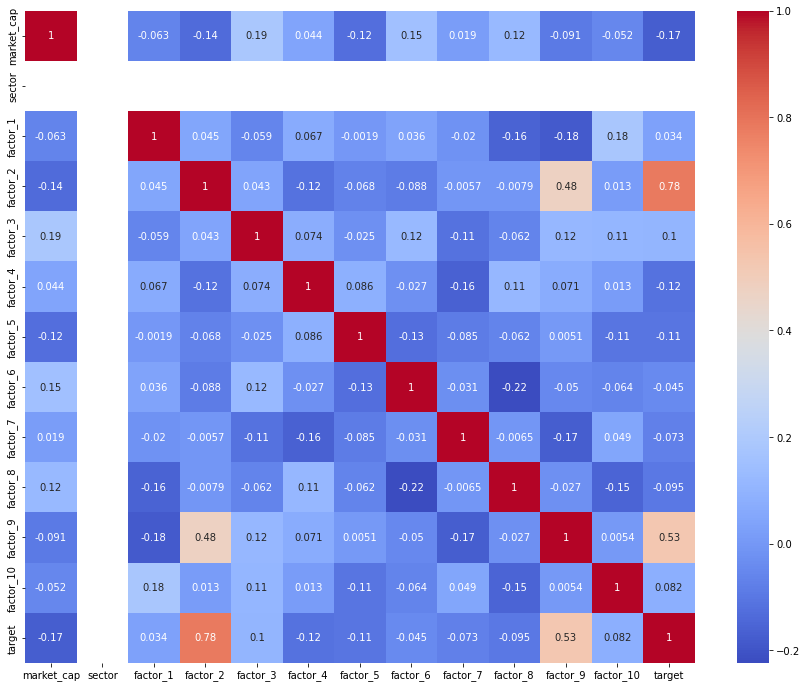

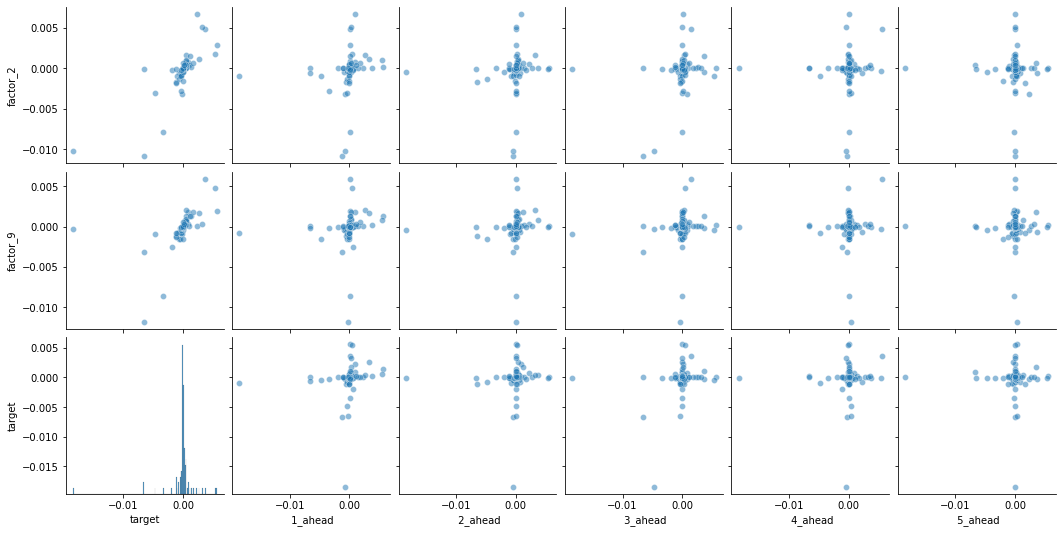

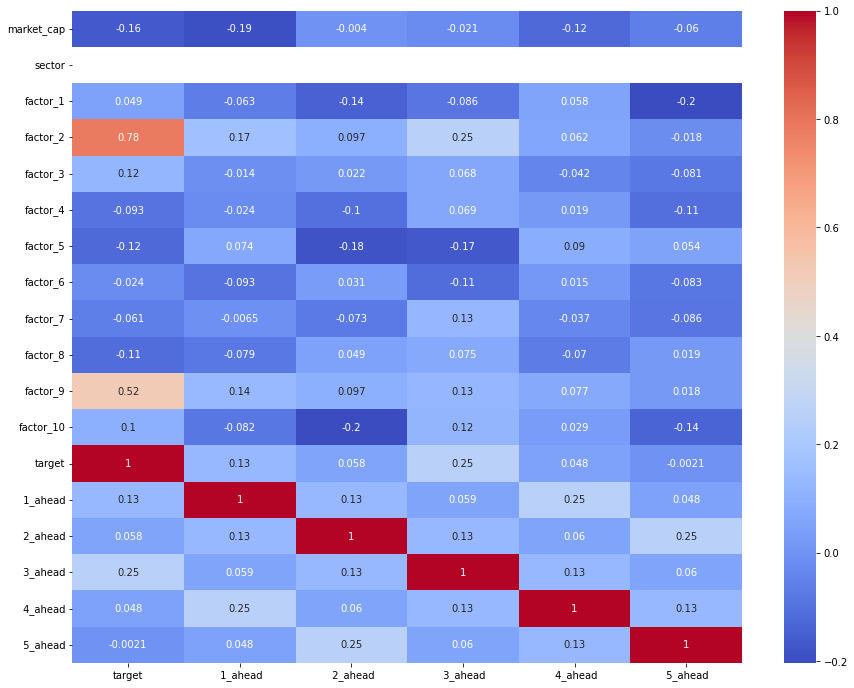

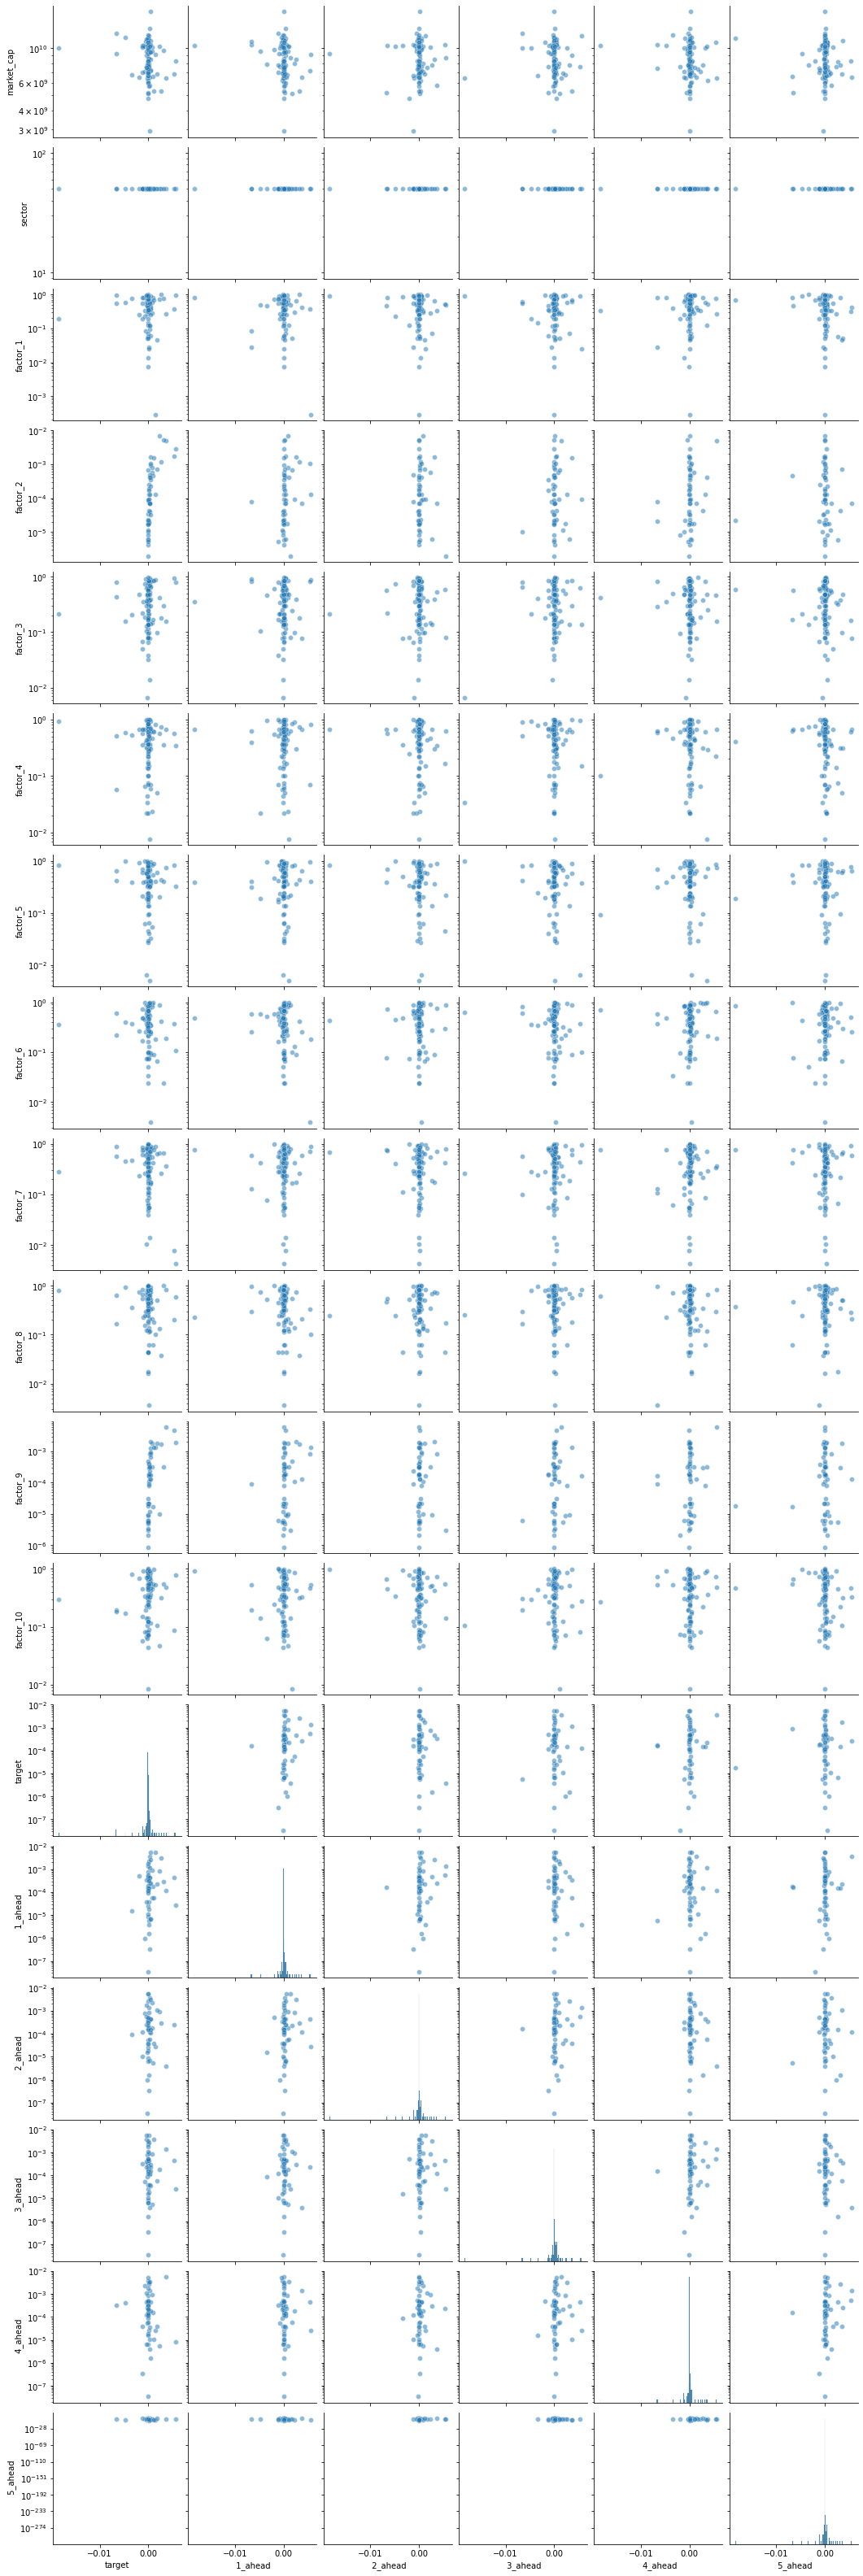

In [188]:
d_firm_shifted = firm_analysis(16, 5)
d_firm_shifted.head()